In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.drop(
    columns="CustomerID",
    inplace=True
)

In [5]:
le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])

In [6]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [7]:
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])

In [11]:
df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])

In [12]:
df["Genre"] = scaler.fit_transform(df[["Genre"]])

In [16]:
X_scaled = df

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

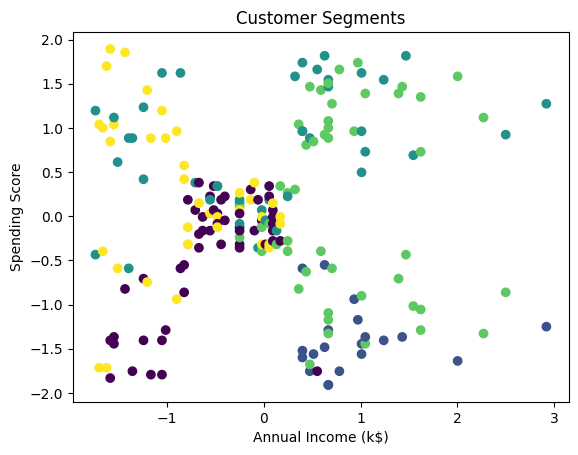

In [22]:
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"]
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

In [24]:
score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.3805322046080448


In [25]:
cluster_profile = df.groupby("Cluster").mean()
print(cluster_profile)

            Genre       Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                
0        0.140624  1.264571           -0.552005               -0.422622
1        1.128152  0.046648            0.938586               -1.403399
2        1.128152 -0.729115            0.013159                0.777910
3       -0.886405 -0.068325            0.823026                0.164952
4       -0.886405 -0.827772           -0.828960                0.233338


### Cluster Interpretation

- Cluster 0: Premium Customers (High Income, High Spending)
- Cluster 1: Upsell Opportunity Customers (High Income, Low Spending)
- Cluster 2: Promotion Sensitive Customers (Low Income, High Spending)
- Cluster 3: Budget-Conscious Customers (Low Income, Low Spending)
- Cluster 4: Average Customers (Moderate Income and Spending)

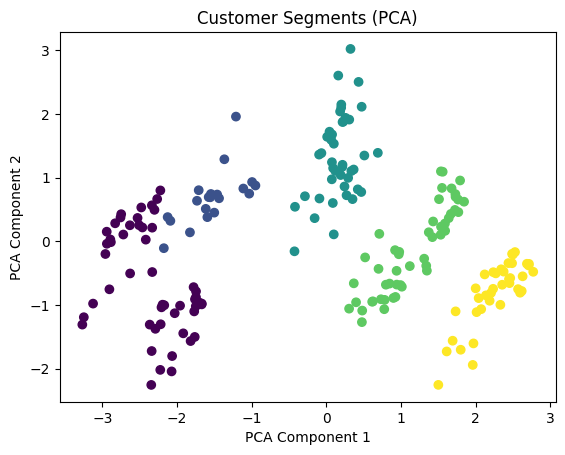

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (PCA)")
plt.show()